In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import nipy
import nibabel
import pandas as pd
import csv
import re
import os
from whatIHave import whatIHave


### TRAER DATOS DESDE CARPETAS FREESURFER/ CARPETA "STATS", BARRIENDO SUJETOS AUTOMÁTICAMENTE

In [2]:
#from nipype.interfaces.ants import CompositeTransformUtil

In [3]:
## Tupla con las tablas básicas estandard por hemisferio desde Freesurfer

basicStats=(
'lh.aparc.a2009s.stats',
'lh.aparc.DKTatlas.stats',
'lh.aparc.pial.stats',
'lh.aparc.stats',
'lh.BA_exvivo.stats',
'lh.BA_exvivo.thresh.stats',
'rh.aparc.a2009s.stats',
'rh.aparc.DKTatlas.stats',
'rh.aparc.pial.stats',
'rh.aparc.stats',
'rh.BA_exvivo.stats',
'rh.BA_exvivo.thresh.stats',
)

rutaStats='/home/pedro/Downloads/DataTesis'
#rutaStats='/home/pedro/Documents/freesurfer/freesurfer/subjects/'

In [4]:
# Se le entrega un path de archivo y genera una tupla con valores de la 
# tabla y sus subíndices fila, columna

def readTable(eachFile):
	fileOpen=eachFile
	f = open(fileOpen, 'r')
	indicador=open(fileOpen, 'r').read().find('ColHeaders')
	text=f.read()
	# Genera un nuevo texto desde original, desde el identificador de tablas
	sizeText=len(text)
	newText= text[indicador:sizeText]
	#Divide el nuevo texto en renglones
	reglones=newText.split('\n')
    
	p=re.compile(r'[\w+\.*\&*]*[\-*\w*]+')
	#
	i=0
	for reglon in reglones: # toma cada renglón y aplica procesamiento# 
	    palabras = p.findall(reglon) ### Hacer match con lo que se encuentra en RegExp ( No espacios pero palabras y números###
	    ## Chequeo de lontigud por si hay cosas debajo de la tabla##
	    if i==0: # Criterio para tomar la lontigud del primer renglon como regla para el resto
	        palabras.remove('ColHeaders')
	        headerCol=palabras
	        wTable=len(palabras)
	    if wTable==len(palabras):## Comprueba si las demás filas tienen el mismo ancho del primer renglon
	        #pass
	        #print (palabras) # Imprime la lista con las palabras separadas en un renglón
	        ## fin de chequeo de lontigud por si hay cosas debajo de la tabla##
	        j=0     ##### Equivalente a número de columna ######
	        ##Se hace un loop por cada renglon, para sacar las palabras y generar subíndices i j (fila, columna)
	        for palabra in palabras:#palabra corresponde a cada uno de los campos de la tabla
	            if j==0:
	                hName=re.sub(r'_', '-', palabra)# ahora ya no es la simple palabra, pero la palabra modificada de _ a -
	            hColF=(headerCol)[j]
	            if i>0 and j!=0:
	                yield (hName,hColF,palabra,i,j) #Imprime la palabra y el subíndice que identifica la posición real en la matriz origen
	            j+= 1 # Incrementa la columna
	        i+= 1   ##### Incrementa el número de renglón o fila #######

In [5]:
    ## Función para encontrar los archivos y el sujeto y poder llegar a leerlos 
    ## basado en ruta
    ## En donde busca dichos sujetos y Carpetas

def searchFS(basicStats, rutaStats ): 
	stats=re.compile(r'stats')
	nameSubjectR=re.compile(r'(\w+)\/stats')# RegExp para sacar el nombre del sujeto en el grupo en paréntesis

	for dirpath, dirs, files in os.walk(rutaStats): # Itera en directori rutaStats para buscar 
	    if stats.search(dirpath): #Busca 'stats' en dirpath
	        nameSubject=nameSubjectR.search(dirpath).group(1) #Toma el Reg Exp para sacar el nombre del sujeto ( Alfanumérico antes de '/stats')
	        for eachFile in files: # Itera archivos en el listado 'files' dentro del directorio que ya hizo match
	            if eachFile in basicStats:# Itera sobre cada archivo dentro de los directorios que hicieron match 'Stats' en este caso y contrasta contra la lista 'basicStats' que tiene el nombre de los archivos que queremos
	                for linea in readTable(dirpath+'/'+eachFile):# A readTable se le alimenta con la ruta y el archivo a analizar
	                    yield (eachFile,nameSubject,linea[0],linea[1],linea[2],linea[3],linea[4])# Itera sobre la función que genera los datos de tabla
                        ###### Nombre_Tabla[0], Sujeto[1], Parte[2], Feature[3], Valor[4] ######
	                #
	                #
	                #readTable(dirpath+'/'+eachFile)
	                #print (palabra,i,j)
	                #print (eachFile, nameSubject) # Imprime el archivo que hizo match y el sujeto de regExp
	                #print(dirpath+'/'+eachFile)
	                #f=open(dirpath+'/'+eachFile)
	                #text=f.read()
	                #print(text)
	                #break
    
   

In [6]:
##Solo funciona para las tablas con lh/rhxxxx.stats###for elemento in searchFS(basicStats, rutaStats):

## CUIDADO CON QUE REG EXP SE USA Y CUAL GRUPO DEBE HACER MATCH PARA BUSCAR
## LO QUE SE QUIERE ENCONTRAR

#nombre=re.compile(r'^(\wh)([\.*\w*\.]*)(stats)')
nombre=re.compile(r'^(\wh)(\.)([\.*\w*\.]*)(\.)(stats)')
##
#1= hemisferio
#3=nombre
#5=stats
##
arr = pd.DataFrame()
#palabras = nombre.findall(reglon)
##################################################################
## (iteración sobre la función anterior searchFS)
## (Imprime cada elemento de dicha fución que con 'yield', va produciendo ouput)

for elemento in searchFS(basicStats, rutaStats):
    tableN = nombre.match(elemento[0]).group(3)
    hemis = nombre.match(elemento[0]).group(1)
    key1=elemento[2]+'-'+elemento[3]+'-'+hemis+'-'+tableN #Elemento 2 es nombre del nucleo
    #    arr.at['Ftr: '+key1+','+hemis+','+elemento[2]+','+elemento[3], 'Sub: '+elemento[1]] = elemento[4]###Se llena el pandas array
    arr.at['Feature: '+key1+',Hemisphere: '+hemis+',Geometric: '+elemento[3]+',Nucleus: '+elemento[2], 'Sub: '+elemento[1]] = elemento[4]###Se llena el pandas array
    


In [7]:
arr.head()

,Sub: 940,Sub: 8,Sub: 145,Sub: 35,Sub: 694,Sub: 795,Sub: 195,Sub: 75,Sub: 1076
"Feature: G-and-S-frontomargin-NumVert-rh-aparc.a2009s,Hemisphere: rh,Geometric: NumVert,Nucleus: G-and-S-frontomargin",927,1032,926,1103,1019,1048,1043,747,1105
"Feature: G-and-S-frontomargin-SurfArea-rh-aparc.a2009s,Hemisphere: rh,Geometric: SurfArea,Nucleus: G-and-S-frontomargin",670,741,649,759,711,705,719,559,825
"Feature: G-and-S-frontomargin-GrayVol-rh-aparc.a2009s,Hemisphere: rh,Geometric: GrayVol,Nucleus: G-and-S-frontomargin",1673,2115,1640,1955,2310,1623,2029,1515,2023
"Feature: G-and-S-frontomargin-ThickAvg-rh-aparc.a2009s,Hemisphere: rh,Geometric: ThickAvg,Nucleus: G-and-S-frontomargin",1.984,2.319,1.998,1.964,2.593,1.876,2.242,2.193,2.039
"Feature: G-and-S-frontomargin-ThickStd-rh-aparc.a2009s,Hemisphere: rh,Geometric: ThickStd,Nucleus: G-and-S-frontomargin",0.611,0.604,0.646,0.686,0.701,0.657,0.640,0.455,0.695


In [8]:
arr.to_csv('tSubjects.csv')

### CAPA DE ADAPTACIÓN PARA COOMPARACIÓN DE DATOS EN MISMA ESCALA. DATOS A COMPARAR DEBEN ESTAR EN FILAS Y NO EN COLUMNAS Y POR LO TANTO ES POSIBLEMENTE NECESARIO TRANSPONER


In [35]:
    # Read data from file 'filename.csv' 
    # (in the same directory that your python process is based)
    # Control delimiters, rows, column names with read_csv (see later) 
    #data = pd.read_csv("/home/pedro/mindboggle/ejemplos/osfstorage-archive/output/mindboggled/arno/tables/left_cortical_surface/label_shapes.csv", index_col = 'ID') 
    datain = pd.read_csv("volumetric.csv", index_col = 0) 
    # Preview the first 5 lines of the loaded data 
    datain.head()

,Sub: 940,Sub: 8,Sub: 145,Sub: 35,Sub: 694,Sub: 795,Sub: 195,Sub: 75,Sub: 1076
"Feature: lh-wm-NVoxels,Hemisphere: lh,Matter: wm,Geometric: NVoxels,Nucleus: bankssts",2201.0000,2243.0000,2063.0000,1967.0000,1670.0000,2479.0000,3181.0000,2651.0000,4101.0000
"Feature: lh-wm-Volume_mm3,Hemisphere: lh,Matter: wm,Geometric: Volume_mm3,Nucleus: bankssts",2201.2000,2242.8000,2063.4000,1966.7000,1670.0000,2478.6000,3181.1000,2650.6000,4101.5000
"Feature: lh-wm-normMean,Hemisphere: lh,Matter: wm,Geometric: normMean,Nucleus: bankssts",102.0957,104.4804,101.2635,103.1352,99.8049,104.7435,104.9090,104.5170,105.2904
"Feature: lh-wm-normStdDev,Hemisphere: lh,Matter: wm,Geometric: normStdDev,Nucleus: bankssts",11.3886,10.9447,12.9483,10.0964,10.4549,8.5076,10.4762,9.7764,10.1884
"Feature: lh-wm-normMin,Hemisphere: lh,Matter: wm,Geometric: normMin,Nucleus: bankssts",64.0000,67.0000,63.0000,67.0000,63.0000,76.0000,69.0000,67.0000,65.0000


In [36]:
data=datain.transpose()

In [37]:
## Solo si quiero  guardar la transposición
#data.to_csv('dataParallel.csv')

In [38]:
## Marcar la data que contiene cero con valor NAN para sacarla de los cómputos
#dNoCero=data[data != 0]

In [222]:
#dNoCero.describe()

In [13]:
#Calcula el valor medio de cada una de las variables numéricas

#Recibe un dataSet Pandas y genera impresión de los puntos medios de cada Columna numérica
#Recorre Columna por Columna en el Dataset
#lambda x: abs((x*10)/cMax)) if x>pMedio else -(x*10)/abs(cMax)
#dNoCero=data[data != 0]
estandarData = data.copy()

i=0
while i<len(data.columns):
    nameCol=data.columns[i]
    if data.dtypes[i]=='float64':
        cMax=float(data[nameCol].max())
        cMin=float(data[nameCol].min())
        pMedio=cMin+((cMax-cMin)/2)
        puntoMax=cMax-pMedio
        #print (pMedio,puntoMax)
        estandarData[nameCol] = data[nameCol].apply(lambda x: abs(((x-pMedio)*10)/puntoMax) if x>=pMedio else -abs(((x-pMedio)*10)/puntoMax))
    i += 1
    

In [39]:
#Calcula el valor medio de cada una de las variables numéricas

#Recibe un dataSet Pandas y genera impresión de los puntos medios de cada Columna numérica
#Recorre Columna por Columna en el Dataset
#lambda x: abs((x*10)/cMax)) if x>pMedio else -(x*10)/abs(cMax)
#dNoCero=data[data != 0]
estandarData = data.copy()

i=0
while i<len(data.columns):
    nameCol=data.columns[i]
    if data.dtypes[i]=='float64':
        cMax=float(data[nameCol].max())
        cMin=float(data[nameCol].min())
        pMedio=float(data[nameCol].mean())
        puntoMax=abs(cMax-pMedio)
        puntoMin=abs(pMedio-cMin)
        #print (pMedio,puntoMax)
        if puntoMax>=puntoMin:
            estandarData[nameCol] = data[nameCol].apply(lambda x: abs(((x-pMedio)*10)/puntoMax) if x>=pMedio else -abs(((x-pMedio)*10)/puntoMax))               
        else:
            estandarData[nameCol] = data[nameCol].apply(lambda x: abs(((x-pMedio)*10)/puntoMin) if x>=pMedio else -abs(((x-pMedio)*10)/puntoMin))                   
    i += 1
    
    


In [40]:
estandarData

,"Feature: lh-wm-NVoxels,Hemisphere: lh,Matter: wm,Geometric: NVoxels,Nucleus: bankssts","Feature: lh-wm-Volume_mm3,Hemisphere: lh,Matter: wm,Geometric: Volume_mm3,Nucleus: bankssts","Feature: lh-wm-normMean,Hemisphere: lh,Matter: wm,Geometric: normMean,Nucleus: bankssts","Feature: lh-wm-normStdDev,Hemisphere: lh,Matter: wm,Geometric: normStdDev,Nucleus: bankssts","Feature: lh-wm-normMin,Hemisphere: lh,Matter: wm,Geometric: normMin,Nucleus: bankssts","Feature: lh-wm-normMax,Hemisphere: lh,Matter: wm,Geometric: normMax,Nucleus: bankssts","Feature: lh-wm-normRange,Hemisphere: lh,Matter: wm,Geometric: normRange,Nucleus: bankssts","Feature: lh-wm-NVoxels,Hemisphere: lh,Matter: wm,Geometric: NVoxels,Nucleus: caudalanteriorcingulate","Feature: lh-wm-Volume_mm3,Hemisphere: lh,Matter: wm,Geometric: Volume_mm3,Nucleus: caudalanteriorcingulate","Feature: lh-wm-normMean,Hemisphere: lh,Matter: wm,Geometric: normMean,Nucleus: caudalanteriorcingulate",...,"Feature: Left-UnsegmentedWhiteMatter-normMin,Hemisphere: Left,Matter: UnsegmentedWhiteMatter,Geometric: normMin,Nucleus:","Feature: Left-UnsegmentedWhiteMatter-normMax,Hemisphere: Left,Matter: UnsegmentedWhiteMatter,Geometric: normMax,Nucleus:","Feature: Left-UnsegmentedWhiteMatter-normRange,Hemisphere: Left,Matter: UnsegmentedWhiteMatter,Geometric: normRange,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-NVoxels,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: NVoxels,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-Volume_mm3,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: Volume_mm3,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normMean,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normMean,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normStdDev,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normStdDev,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normMin,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normMin,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normMax,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normMax,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normRange,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normRange,Nucleus:"
Sub: 940,-1.913886,-1.911949,-3.556219,3.547018,-3.012048,1.2500,2.735849,-3.331617,-3.328185,-0.375258,...,-2.941176,-5.949367,-2.139738,-5.811199,-5.811146,-6.163433,-1.762614,-1.938776,-6.578947,-1.867470
Sub: 8,-1.650526,-1.651181,3.151693,1.710461,0.240964,4.0625,1.037736,-3.609681,-3.607722,-10.000000,...,0.000000,10.000000,6.899563,1.243719,1.243688,-10.000000,5.643985,-7.448980,-6.578947,1.385542
Sub: 145,-2.779210,-2.775742,-5.897111,10.000000,-4.096386,6.8750,5.283019,-0.025747,-0.023166,1.428286,...,2.352941,2.025316,-0.174672,-0.291338,-0.291483,8.078113,1.871357,10.000000,2.894737,-4.578313
Sub: 35,-3.381175,-3.381902,-0.632214,-1.799230,0.240964,-7.1875,-2.358491,0.128733,0.129730,-7.437968,...,0.000000,-3.101266,-2.139738,-0.897344,-0.897427,2.077390,-6.607523,-0.102041,1.710526,0.843373
Sub: 694,-5.243503,-5.241753,-10.000000,-0.315999,-4.096386,-10.0000,0.188679,3.202884,3.204633,4.091294,...,10.000000,-4.810127,-10.000000,-1.880235,-1.879956,0.018894,-10.000000,10.000000,-8.947368,-10.000000
Sub: 795,-0.170696,-0.173079,3.891766,-8.372607,10.000000,-7.1875,-10.000000,-8.800206,-8.800000,4.532830,...,-3.529412,0.316456,2.576419,-1.037928,-1.038011,1.850739,2.293106,1.734694,10.000000,3.554217
Sub: 195,4.231171,4.230512,4.357300,-0.227875,2.409639,6.8750,0.188679,3.141092,3.133591,5.201796,...,3.529412,2.025316,-0.960699,0.084949,0.084802,1.775738,7.252407,-9.285714,4.078947,7.349398
Sub: 75,0.907824,0.905096,3.254645,-3.123173,0.240964,4.0625,1.037736,-0.705458,-0.708880,3.714036,...,-2.941176,2.594937,3.755459,-1.410625,-1.410467,4.102160,6.496726,-4.693878,1.710526,3.554217
Sub: 1076,10.000000,10.000000,5.430139,-1.418596,-1.927711,1.2500,1.886792,10.000000,10.000000,-1.155017,...,-6.470588,-3.101266,2.183406,10.000000,10.000000,

In [41]:
estandarData.describe()

,"Feature: lh-wm-NVoxels,Hemisphere: lh,Matter: wm,Geometric: NVoxels,Nucleus: bankssts","Feature: lh-wm-Volume_mm3,Hemisphere: lh,Matter: wm,Geometric: Volume_mm3,Nucleus: bankssts","Feature: lh-wm-normMean,Hemisphere: lh,Matter: wm,Geometric: normMean,Nucleus: bankssts","Feature: lh-wm-normStdDev,Hemisphere: lh,Matter: wm,Geometric: normStdDev,Nucleus: bankssts","Feature: lh-wm-normMin,Hemisphere: lh,Matter: wm,Geometric: normMin,Nucleus: bankssts","Feature: lh-wm-normMax,Hemisphere: lh,Matter: wm,Geometric: normMax,Nucleus: bankssts","Feature: lh-wm-normRange,Hemisphere: lh,Matter: wm,Geometric: normRange,Nucleus: bankssts","Feature: lh-wm-NVoxels,Hemisphere: lh,Matter: wm,Geometric: NVoxels,Nucleus: caudalanteriorcingulate","Feature: lh-wm-Volume_mm3,Hemisphere: lh,Matter: wm,Geometric: Volume_mm3,Nucleus: caudalanteriorcingulate","Feature: lh-wm-normMean,Hemisphere: lh,Matter: wm,Geometric: normMean,Nucleus: caudalanteriorcingulate",...,"Feature: Left-UnsegmentedWhiteMatter-normMin,Hemisphere: Left,Matter: UnsegmentedWhiteMatter,Geometric: normMin,Nucleus:","Feature: Left-UnsegmentedWhiteMatter-normMax,Hemisphere: Left,Matter: UnsegmentedWhiteMatter,Geometric: normMax,Nucleus:","Feature: Left-UnsegmentedWhiteMatter-normRange,Hemisphere: Left,Matter: UnsegmentedWhiteMatter,Geometric: normRange,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-NVoxels,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: NVoxels,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-Volume_mm3,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: Volume_mm3,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normMean,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normMean,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normStdDev,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normStdDev,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normMin,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normMin,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normMax,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normMax,Nucleus:","Feature: Right-UnsegmentedWhiteMatter-normRange,Hemisphere: Right,Matter: UnsegmentedWhiteMatter,Geometric: normRange,Nucleus:"
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,...,9.000000,9.000000e+00,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
mean,3.947460e-16,-7.894919e-16,-8.881784e-15,1.036208e-15,6.735353e-15,-4.194176e-15,-7.401487e-16,2.368476e-15,7.894919e-16,-1.102822e-14,...,0.000000,-7.154771e-15,-4.934325e-15,0.000000,-1.578984e-15,3.626729e-15,2.368476e-15,4.934325e-17,1.492633e-14,9.190179e-16
std,4.634031e+00,4.633389e+00,5.384776e+00,5.009531e+00,4.363625e+00,6.461273e+00,4.282853e+00,5.270352e+00,5.269504e+00,5.442612e+00,...,4.868513,4.909247e+00,4.785695e+00,4.225172,4.225145e+00,5.408236e+00,6.215862e+00,6.833117e+00,6.127964e+00,5.079567e+00
min,-5.243503e+00,-5.241753e+00,-1.000000e+01,-8.372607e+00,-4.096386e+00,-1.000000e+01,-1.000000e+01,-8.800206e+00,-8.800000e+00,-1.000000e+01,...,-6.470588,-5.949367e+00,-1.000000e+01,-5.811199,-5.811146e+00,-1.000000e+01,-1.000000e+01,-9.285714e+00,-8.947368e+00,-1.000000e+01
25%,-2.779210e+00,-2.775742e+00,-3.556219e+00,-1.799230e+00,-3.012048e+00,-7.187500e+00,1.886792e-01,-3.331617e+00,-3.328185e+00,-1.155017e+00,...,-2.941176,-3.101266e+00,-2.139738e+00,-1.410625,-1.410467e+00,-1.739601e+00,-5.187444e+00,-4.693878e+00,-6.578947e+00,-1.867470e+00
50%,-1.650526e+00,-1.651181e+00,3.151693e+00,-3.159995e-01,2.409639e-01,1.250000e+00,1.037736e+00,-2.574665e-02,-2.316602e-02,1.428286e+00,...,0.000000,3.164557e-01,-1.746725e-01,-0.897344,-8.974273e-01,1.775738e+00,1.871357e+00,-1.020408e-01,1.710526e+00,8.433735e-01
75%,9.078241e-01,9.050956e-01,3.891766e+00,1.710461e+00,2.409639e-01,4.062500e+00,1.886792e+00,3.141092e+00,3.133591e+00,4.091294e+00,...,2.352941,2.025316e+00

In [42]:
edo=estandarData.transpose()

In [43]:
edo.head()

,Sub: 940,Sub: 8,Sub: 145,Sub: 35,Sub: 694,Sub: 795,Sub: 195,Sub: 75,Sub: 1076
"Feature: lh-wm-NVoxels,Hemisphere: lh,Matter: wm,Geometric: NVoxels,Nucleus: bankssts",-1.913886,-1.650526,-2.779210,-3.381175,-5.243503,-0.170696,4.231171,0.907824,10.000000
"Feature: lh-wm-Volume_mm3,Hemisphere: lh,Matter: wm,Geometric: Volume_mm3,Nucleus: bankssts",-1.911949,-1.651181,-2.775742,-3.381902,-5.241753,-0.173079,4.230512,0.905096,10.000000
"Feature: lh-wm-normMean,Hemisphere: lh,Matter: wm,Geometric: normMean,Nucleus: bankssts",-3.556219,3.151693,-5.897111,-0.632214,-10.000000,3.891766,4.357300,3.254645,5.430139
"Feature: lh-wm-normStdDev,Hemisphere: lh,Matter: wm,Geometric: normStdDev,Nucleus: bankssts",3.547018,1.710461,10.000000,-1.799230,-0.315999,-8.372607,-0.227875,-3.123173,-1.418596
"Feature: lh-wm-normMin,Hemisphere: lh,Matter: wm,Geometric: normMin,Nucleus: bankssts",-3.012048,0.240964,-4.096386,0.240964,-4.096386,10.000000,2.409639,0.240964,-1.927711


In [44]:
#edoCol = edo.reset_index()
#edoColSep=edoCol['index'].str.split(pat = ',', expand=True)

In [45]:
#edo = pd.concat([edoColSep, edoCol], axis=1, sort=False)

In [18]:
#edo

In [46]:
edo.to_csv('volNormalizado.csv')

### DESDE TSV EN FORMATO TXT, SE PASAN DATOS A JSON PARA CLUSTERGRAMMER

In [20]:
## https://onlinecsvtools.com/convert-csv-to-tsv
#### INGRESAN ARCHIVOS TSV EN FORMATO TXT, NORMALMENTE DEBEN PRE CONVERTIRSE DESDE CSV

from clustergrammer import Network
net = Network()
net.load_file('toJson.txt')

/home/pedro/python3.5/p3.5/lib/python3.5/site-packages/clustergrammer/load_data.py:70: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  tmp_df['mat'] = pd.read_table(file_buffer, index_col=row_arr)


In [55]:
#anal = pd.read_csv("normalizado1.csv", index_col = 0)

In [56]:
#anal.columns

In [57]:
#anal['3'].unique()

In [48]:
## SE ALIMENTA CON TSV LUEGO DE SER CONVERTIDO

##Matriz de afinidad
##https://github.com/MaayanLab/clustergrammer-py/blob/master/make_clustergrammer.py
#The clustergrammer python module can be installed using pip:
#pip install clustergrammer
#or by getting the code from the repo:
#https://github.com/MaayanLab/clustergrammer-py

# from clustergrammer import Network
from clustergrammer import Network
net = Network()

# load matrix tsv file
#net.load_file('/home/pedro/Desktop/Codigo/Capa_Adaptacion/estandarData.tsv')
net.load_file('volJson.txt')
# net.load_file('txt/rc_val_cats.txt')

# optional filtering and normalization
##########################################
# net.filter_sum('row', threshold=20)
# net.normalize(axis='col', norm_type='zscore', keep_orig=True)
# net.filter_N_top('row', 250, rank_type='sum')
# net.filter_threshold('row', threshold=3.0, num_occur=4)
# net.swap_nan_for_zero()
# net.downsample(ds_type='kmeans', axis='col', num_samples=10)
# net.random_sample(random_state=100, num_samples=10, axis='col')
# net.clip(-6,6)
# net.filter_cat('row', 1, 'Gene Type: Interesting')
# net.set_cat_color('col', 1, 'Category: one', 'blue')

net.cluster(dist_type='cos',views=['N_row_sum', 'N_row_var'] , dendro=True,
             sim_mat=True, filter_sim=0.1, calc_cat_pval=False, enrichrgram=True)

# write jsons for front-end visualizations
net.write_json_to_file('viz', '/home/pedro/Desktop/cluster/clustergrammer-master/json/edo1.json', 'no-indent')
net.write_json_to_file('sim_row', '/home/pedro/Desktop/cluster/clustergrammer-master/json/edo1_row.json', 'no-indent')
net.write_json_to_file('sim_col', '/home/pedro/Desktop/cluster/clustergrammer-master/json/edo1_col.json', 'no-indent')

in make_sim_mat, which_sim: ['row', 'col']


### TOMAR IMAGENES Y SEGMENTARLAS PARA LUEGO PASARLAS A FORMATO .OBJ

In [1]:
from nipype.interfaces.ants import CompositeTransformUtil


In [23]:
##Formato datos Kanguro
## Imágenes#########

###/home/pedro/Downloads/DataTesis/(35)_2019-03-15_18-33-16/35/mri/aparc+aseg.mgz
###/home/pedro/Downloads/DataTesis/(35)_2019-03-15_18-33-16/35/mri/wmparc.mgz
## Estadísticas#######

##/home/pedro/Downloads/DataTesis/(8)_2019-03-15_18-33-16/8/stats
##

In [20]:
## wmparc, aparc+aseg, mejores resultados

#img = nibabel.load('wmparc.mgz')
#img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/gmparc.mgz')
#img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/brainmask.mgz')
#img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/aseg.mgz')
#img = nibabel.load('/home/pedro/Documents/freesurfer/freesurfer/subjects/bert/mri/aparc+aseg.mgz')

#img = nibabel.load('/home/pedro/Downloads/DataTesis/(8)_2019-03-15_18-33-16/T1W3DTFESENSE.nii.gz')
img = nibabel.load('/home/pedro/Downloads/DataTesis/(35)_2019-03-15_18-33-16/35/mri/wmparc.mgz')
########img = nibabel.load('/home/pedro/Downloads/DataTesis/(195)/195/mri/wmparc.mgz')
########img = nibabel.load('/home/pedro/Downloads/DataTesis/(1076)_2019-03-27_15-22-26/1076/mri/wmparc.mgz')



In [21]:
image_data = img.get_fdata()
p=np.asarray(image_data)


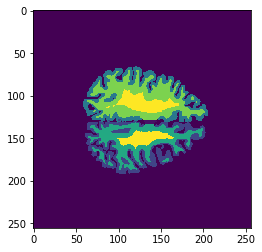

In [22]:
# Selecciona una sola seccion de un numpy array
section=p[:,100,:]
plt.imshow(section)
plt.show()

In [23]:
# Se tiene el array 3d con todos los valores segmentados
k=np.unique(p)
len(k)

183

In [24]:
for valores in k:
    whatIHave(valores) # Por cada valor ünico en el array, se entrega la equivalencia con la función whatIHave

Unknown
Left-Cerebral-White-Matter
Left-Lateral-Ventricle
Left-Inf-Lat-Vent
Left-Cerebellum-White-Matter
Left-Cerebellum-Cortex
Left-Thalamus-Proper
Left-Caudate
Left-Putamen
Left-Pallidum
3rd-Ventricle
4th-Ventricle
Brain-Stem
Left-Hippocampus
Left-Amygdala
CSF
Left-Accumbens-area
Left-VentralDC
Left-vessel
Left-choroid-plexus
Right-Cerebral-White-Matter
Right-Lateral-Ventricle
Right-Inf-Lat-Vent
Right-Cerebellum-White-Matter
Right-Cerebellum-Cortex
Right-Thalamus-Proper
Right-Caudate
Right-Putamen
Right-Pallidum
Right-Hippocampus
Right-Amygdala
Right-Accumbens-area
Right-VentralDC
Right-vessel
Right-choroid-plexus
5th-Ventricle
WM-hypointensities
Optic-Chiasm
CC_Posterior
CC_Mid_Posterior
CC_Central
CC_Mid_Anterior
CC_Anterior


In [25]:
################## Segmentar ( primera opción)******


#mask=np.logical_not(np.logical_or(p==54, p==18))
mask=np.logical_or(p==17, p==53) # Mismo anterior, Mas simple?

np.place(p, mask, 100) # Pone 100 en el valor seleccionado por la máscara, es decir, reemplaza el valor
#np.place(p, p==17, 100)
np.place(p, p!=100, 0)

###################### Segmentar

In [ ]:
## SIMILAR AL ANTERIOR PERO TOMA CADA NÚMERO DE FORMA SEPARADA  (Segunda Opción)******
##
np.place(p, p==17, 10) # Pone 100 en el valor seleccionado por la máscara
np.place(p, p==53, 10)
#np.place(p, p==17, 500)
#np.place(p, np.logical_and(p!=100, p!=500), 0)
np.place(p, p!=10, 0)

In [ ]:
#toma lo que hay en "valor" y lo resalta con un númerp 500, el resto de cerebro lo toma en 100   (Tercer Opción)******
#np.place usa el array, mascara y valor a asignar
#valuePart= [7 or 8 or 16 or 46 or 47]
valuePart= [17 or 53]

mask=np.logical_and(p!=0, p!=valuePart)
np.place(p, mask, 100) # Pone 100 en el valor seleccionado por la máscara
np.place(p, p==valuePart, 500)

In [26]:
np.unique(p)


array([  0., 100.])

In [27]:
n=p

In [28]:
################################ Centro de masa del arreglo ###########################
###A 3D array is like a stack of matrices:
#
#The first index, i, selects the matrix
#The second index, j, selects the row
#The third index, k, selects the column

cX=0
for i in range (n.shape[0]):
    cX=((n[i,:,:].sum())*i)+cX
cX=cX/n.sum()
##    
cY=0
for j in range (n.shape[1]):
    cY=((n[:,j,:].sum())*j)+cY
cY=cY/n.sum()
##
cZ=0
for k in range (n.shape[2]):
    cZ=((n[:,:,k].sum())*k)+cZ
cZ=cZ/n.sum()
    
print(cX,cY,cZ)    
    
    

126.69073455759599 140.5518920422927 124.97189760712298


In [34]:
n.min()

0.0

In [25]:
p.sum()

838600.0

In [ ]:
np.count_nonzero(p)

In [11]:
############################      GRAFICAL LOCAL 3D ANTES DE IMPRESIÓN A .OBJ     ##############################
from mayavi import mlab
src = mlab.pipeline.scalar_field(n)
mlab.pipeline.iso_surface(src, contours=[n.min()+0.1*n.ptp(), ], opacity=0.3)
mlab.pipeline.iso_surface(src, contours=[n.max()-0.1*n.ptp(), ],)

mlab.show()

In [56]:
## Generar el archivo .obj desde el array "p"
##verts, faces, normals, values = measure.marching_cubes_lewiner(p, 0)
from skimage import measure
verts, faces, normals, values = measure.marching_cubes_lewiner(n, 0) # Genera info de obj desde arran 'n'
faces=faces +1

In [58]:
thefile = open('2hipos1076.obj', 'w')
for item in verts:
  thefile.write("v {0} {1} {2}\n".format(item[0],item[1],item[2]))
#################
for item in faces:
  thefile.write("f {2}//{2} {1}//{1} {0}//{0}\n".format(item[0],item[1],item[2]))  

thefile.close()
